# yıllara göre elektrik üretim verisi

In [113]:
# csv dosyasını oku

import pandas as pd
df = pd.read_csv("Electric_Production.csv",parse_dates=["DATE"],index_col="DATE").asfreq("MS")
df

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [114]:
# eksik veri kontrolü

df.isnull().sum()

IPG2211A2N    0
dtype: int64

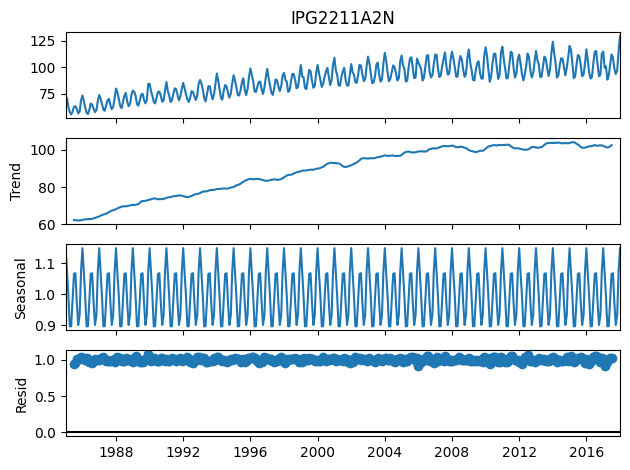

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec_df = seasonal_decompose(df["IPG2211A2N"], model="mul", period=12)
dec_plot = dec_df.plot()

In [116]:
# durağan testi p_value 0.5 den büyükse durağan değildir

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df["IPG2211A2N"])
#print(adf_test)
p_value = adf_test[1]
print(p_value)

0.18621469116586592


In [117]:
# durağan hale getirme
# df1 adlı değişken anımladım

df1 = df.diff().diff(12).dropna()

# kontol etme
adf_test = adfuller(df1["IPG2211A2N"])
p_value = adf_test[1]
print(p_value)

# bir kere diff işleminden sonra durağan hale geliyor

2.0639252090771566e-12


In [6]:
# acf grafiğine bak eğer acf grafiğinde aşağı doğru bir kuyruk varsa AR modeline uygundur 
# pacf grafiğine bak eğer pacf grafiğinde ani azalış-ani kesilme varsa AR modeline uygundur
# p parametresi de pacf grafiğine bakarak seçilir. 0.cı çubuktan sonra kaç tane anlamlı çubuk varsa katsayı o kadar olur.

# acf grafiğine bak eğer acf grafiğinde ani azalış-ani kesilme varsa MA modeline uygundur
# pacf grafiğine bak eğer pacf grafiğinde aşağı doğru bir kuyruk varsa MA modeline uygundur
# q parametresi de acf grafiğine bakarak seçilir. 0.cı çubuktan sonra kaç tane anlamlı çubuk varsa katsayı o kadar olur.

# Bir zaman serisinin ARMA modele uygun olup olmadigini anlamak icin ACF ve PACF grafiklerine bakmak gerekir. Eger hem ACF grafiginde hem de PACF grafiginde kuyruk var ise ARMA modeli tercih edilir. ARMA modelinin q parametresi PACF grafigine bakilarak, p parametresi ise ACF grafiginde bakilarak secilir


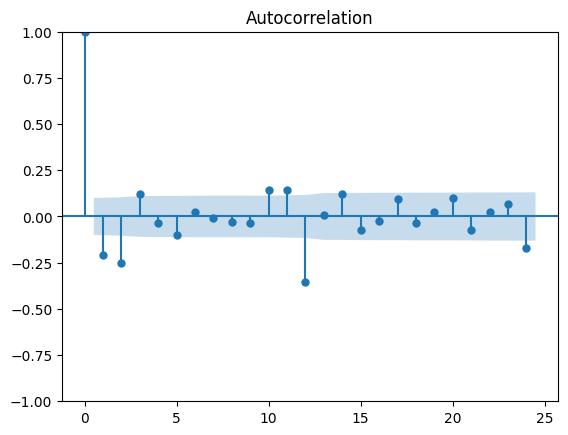

In [118]:
# df1 in acf grafiğine baktım

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plot_acf(df1["IPG2211A2N"], lags=24)

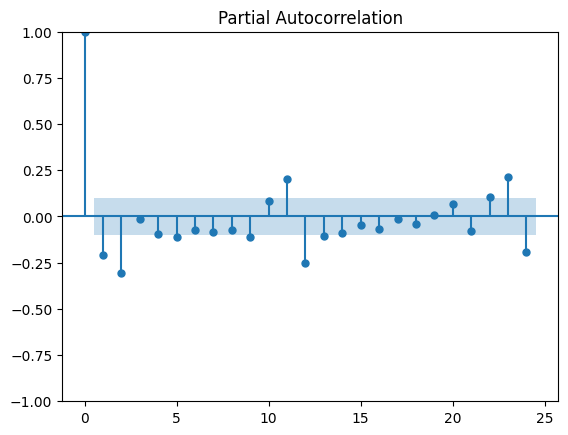

In [119]:
# df1 in acf grafiğine baktım

fig = plot_pacf(df1["IPG2211A2N"], lags=24)

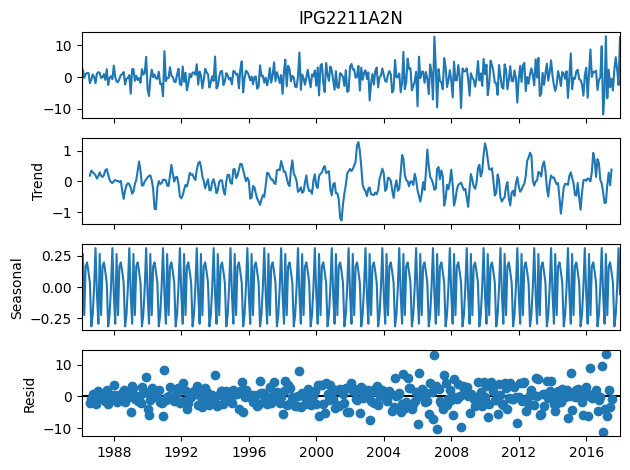

In [122]:
# df1 in acf grafiğine baktım

from statsmodels.tsa.seasonal import seasonal_decompose
dec_df = seasonal_decompose(df1["IPG2211A2N"], model="add", period=12)
dec_plot = dec_df.plot()

In [123]:
# df veri setimi böldüm

train, test = df[:-40], df[-40:]

In [71]:
# auto hiperparametre bul

import pmdarima as pm
model = pm.auto_arima(train["IPG2211A2N"],
                      seasonal=True, m=12,
                      d=1, 
                      D=1,
                 	  max_p=2, max_q=2,
                      max_P=2, max_Q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1550.437, Time=1.66 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1741.116, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1683.511, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1597.961, Time=0.33 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1549.849, Time=1.20 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=inf, Time=1.12 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=1549.626, Time=3.04 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=1548.764, Time=4.38 sec
 ARIMA(2,1,2)(2,1,2)[12]             : AIC=1542.388, Time=5.20 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=1543.029, Time=3.82 sec
 ARIMA(1,1,2)(2,1,2)[12]             : AIC=1540.620, Time=3.42 sec
 ARIMA(1,1,2)(1,1,2)[12]             : AIC=1547.103, Time=2.65 sec
 ARIMA(1,1,2)(2,1,1)[12]             : AIC=1541.234, Time=2.19 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1548.985, Time=0.99 sec
 ARIMA(0,1,2)(2,1,2)[12]

In [72]:
# Modelin özetini al
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  357
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -762.546
Date:                            Sat, 13 Jan 2024   AIC                           1539.093
Time:                                    16:09:27   BIC                           1565.977
Sample:                                01-01-1985   HQIC                          1549.801
                                     - 09-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0037      0.001     -2.808      0.005      -0.006      -0.001
ar.L1          0.5400      0.052   

In [54]:
# hiperparametre bul 
# mevsimsellik mevcut

import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

order_aic_bic = []
for p in range(0, 2):
    for q in range(0, 2):
        for P in range(0, 2):  # Mevsimsel AR terimi
            for Q in range(0, 2):  # Mevsimsel MA terimi
                for d in range(0,2):
                    for D in range(0,2):
                        for trend in ["t", "n", "c", "ct"]:
                            model = SARIMAX(train["IPG2211A2N"], order=(p, d, q), seasonal_order=(P, D, Q, 12),trend=trend)
                            model_fit = model.fit()
                            aic = model_fit.aic
                            bic = model_fit.bic
                            order_aic_bic.append((p, d, q, P, D, Q, trend, aic, bic))
                
order_df = pd.DataFrame(order_aic_bic, columns=["p", "q", "d", "P", "D", "Q", trend, "AIC", "BIC"])
print(order_df.sort_values("AIC").head(3))
print(order_df.sort_values("BIC").head(3))

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as st

     p  q  d  P  D  Q  ct          AIC          BIC
151  1  0  0  0  1  1  ct  1543.507918  1562.725640
183  1  0  0  1  1  1  ct  1544.123159  1567.184426
215  1  0  1  0  1  1  ct  1544.317091  1567.378358
     p  q  d  P  D  Q  ct          AIC          BIC
151  1  0  0  0  1  1  ct  1543.507918  1562.725640
221  1  1  1  0  1  1   n  1548.692476  1564.055043
222  1  1  1  0  1  1   c  1546.338033  1565.541242


In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train["IPG2211A2N"], order=(1,1,1), seasonal_order=(2,1,1,12), trend="c")
#model = SARIMAX(train["IPG2211A2N"], order=(1,0,0), seasonal_order=(0,1,1,12), trend="ct")
# Modeli eğit              
model_fit = model.fit()

# Tahminleri yap
fitted = model_fit.predict()

# hata payını al
resids = model_fit.resid

# tahminleri train içine ekleyin

train.loc[:,"fitted"] = fitted

In [74]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         IPG2211A2N   No. Observations:                  357
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -762.546
Date:                            Sat, 13 Jan 2024   AIC                           1539.093
Time:                                    16:09:49   BIC                           1565.977
Sample:                                01-01-1985   HQIC                          1549.801
                                     - 09-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0037      0.001     -2.808      0.005      -0.006      -0.001
ar.L1          0.5400      0.052   

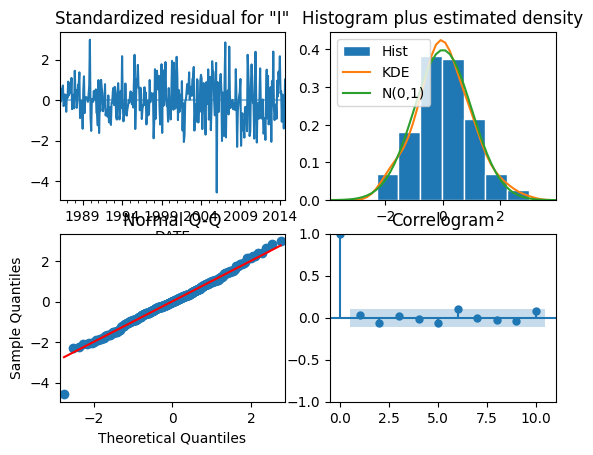

In [75]:
diags = model_fit.plot_diagnostics()

<Axes: xlabel='DATE'>

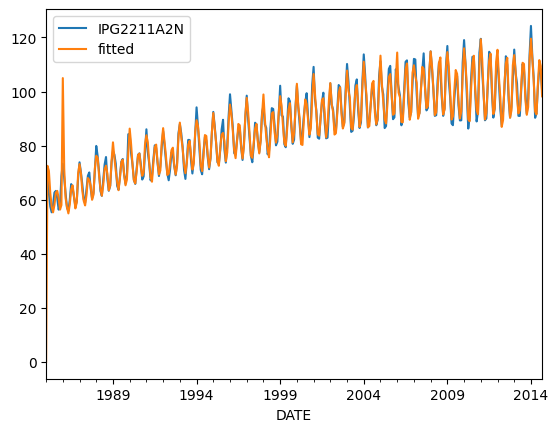

In [76]:
train.plot()

test verisi için

In [81]:
# test verilerinin tahminini yap

test_predicted = model_fit.forecast(steps=len(test))


<Axes: xlabel='DATE'>

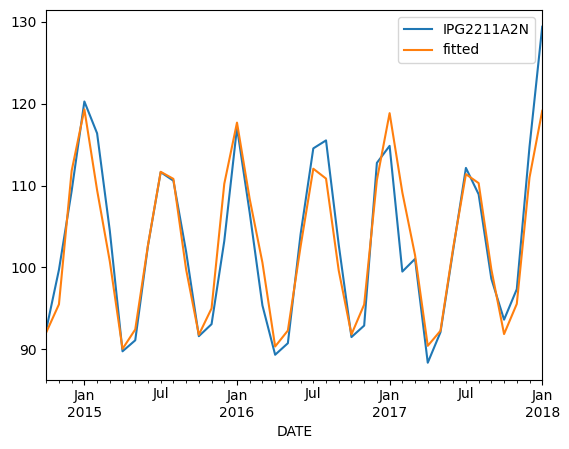

In [82]:
test.loc[:,"fitted"] = test_predicted
test.plot()

train ile test verilerini karşılaştır ve overfit kontrolü yap

In [124]:
# train verisi için; 
print("---train verisi---")
import numpy as np
mae = np.mean(np.abs(resids.values))
mse = np.mean(np.square(resids.values))
rmse = np.sqrt(np.mean(np.square(resids.values)))
print(mae)
print(mse)
print(rmse)

print()

# test verisi için;
print("---test verisi---")
mae = np.mean(np.abs(test["IPG2211A2N"]-test_predicted))
mse = np.mean(np.square(test["IPG2211A2N"]-test_predicted))
rmse = np.sqrt(np.mean(np.square(test["IPG2211A2N"]-test_predicted)))
print(mae)
print(mse)
print(rmse)

---train verisi---
2.0552653056680725
22.95242057449743
4.790868457231677

---test verisi---
2.4037923034212088
11.874057268831422
3.445875399493055


geleceğe yönelik tahmin

In [125]:
# verinin tümünü kullanarak tekrardan fit et

model = SARIMAX(train["IPG2211A2N"], order=(2,1,1), seasonal_order=(2,0,2,12), trend="n")
forecasts = model_fit.get_forecast(steps=10)
tahmin_değerleri = forecasts.predicted_mean
tahmin_değerleri

2014-10-01     92.051321
2014-11-01     95.485858
2014-12-01    111.800770
2015-01-01    119.309701
2015-02-01    109.439873
2015-03-01    100.730651
2015-04-01     90.044385
2015-05-01     92.416383
2015-06-01    102.715081
2015-07-01    111.678494
Freq: MS, Name: predicted_mean, dtype: float64